In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
traing_data = datasets.FashionMNIST(root= 'data',
                                    train = True,
                                    download = True,
                                    transform = ToTensor())
test_data = datasets.FashionMNIST(root='data',
                                 train = False,
                                 download = True,
                                 transform = ToTensor())

In [ ]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
batch_size = 64
train_dataloader = DataLoader(traing_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

In [ ]:
test_data.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f'{device}')

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

cpu
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch %100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X,y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct+= (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct/= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1} \n---------------------------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(train_dataloader, model, loss_fn, optimizer)
print('Done')

Epoch 1 
---------------------------------------
loss: 2.297869  [    0/60000]
loss: 0.584347  [ 6400/60000]
loss: 0.390918  [12800/60000]
loss: 0.494918  [19200/60000]
loss: 0.432548  [25600/60000]
loss: 0.443364  [32000/60000]
loss: 0.378719  [38400/60000]
loss: 0.532748  [44800/60000]
loss: 0.467567  [51200/60000]
loss: 0.509605  [57600/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.380258 

Epoch 2 
---------------------------------------
loss: 0.265004  [    0/60000]
loss: 0.352405  [ 6400/60000]
loss: 0.279014  [12800/60000]
loss: 0.398247  [19200/60000]
loss: 0.417443  [25600/60000]
loss: 0.366146  [32000/60000]
loss: 0.297852  [38400/60000]
loss: 0.458493  [44800/60000]
loss: 0.424729  [51200/60000]
loss: 0.473092  [57600/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.342803 

Epoch 3 
---------------------------------------
loss: 0.227770  [    0/60000]
loss: 0.326446  [ 6400/60000]
loss: 0.221885  [12800/60000]
loss: 0.329838  [19200/60000]
loss: 0.397958  [25600/60000]

In [ ]:
torch.save(model.state_dict(),'model.pth')


In [ ]:
model_load = NeuralNetwork()
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0] , test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'{predicted}, {actual}')

Ankle boot, Ankle boot


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    train = True,
    download = True,
    transform = ToTensor(),
    root = 'data'
)
test_data = datasets.FashionMNIST(
    train = False,
    download = True,
    transform = ToTensor(),
    root = 'data'
)

In [ ]:
type(training_data[0][0])

torch.Tensor

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


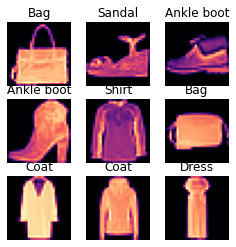

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
label = {i:cls for i,cls in zip(range(len(training_data.classes)),training_data.classes) }
print(label)
figure = plt.figure(figsize=(4, 4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, la = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label[la])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="magma")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None,
                 target_transform = None):
        self.img_labels = pd.read_csv(annotations_file, names =['file_name','label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform :
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


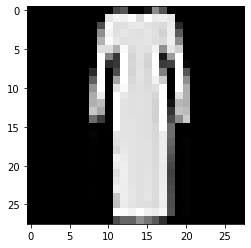

Label: 3


torch.Size([64, 1, 28, 28])

In [ ]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
train_features.size()